In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#from sklearn.decomposition import PCA
from numpy.linalg import eig
import seaborn as sns
%matplotlib inline

In [18]:
left = np.load("./matrix_source/video_3_left_s.mp4.npy")
mid = np.load("./matrix_source/video_3_mid_s.mp4.npy")
right = np.load("./matrix_source/video_3_right_s.mp4.npy")

切600<br>
  1.保持長度一致

In [19]:
left_600 = left[:600,]
mid_600 = mid[:600,]
right_600 = right[:600,]
M = np.hstack((left_600,mid_600,right_600)).T
M.shape

(6, 600)

pca 是照書上寫出來的

In [20]:
def plot_finction(x,title="title"):
    plt.plot(np.arange(x.shape[0]) , x[:,1] ,"red" ,label="Y")
    plt.plot(np.arange(x.shape[0]) , x[:,0] , "green",label="X")
    red_patch = mpatches.Patch(color='red', label='Y')
    green_patch = mpatches.Patch(color='green', label='X')
    plt.legend(handles=[red_patch,green_patch])
    plt.title(title)
    
def plot_finction2(x,title="title"):
    plt.plot(np.arange(x.shape[0]) , x[:,0] ,"red" ,label="PC1")
    plt.plot(np.arange(x.shape[0]) , x[:,1] , "green",label="PC2")
    red_patch = mpatches.Patch(color='red', label="PC1")
    green_patch = mpatches.Patch(color='green', label="PC2")
    plt.legend(handles=[red_patch,green_patch])
    plt.title(title)
    
def pca(M):
    m , n = M.shape
    mn = np.mean(M, axis=1)
    M_m = M.T-mn
    Cx = (1/(n-1))*M_m.T@M_m
    D,V=eig(Cx)
    return M_m.T,D,V

def plot_pca(x):
    plt.plot(np.arange(x.shape[1]) , x[0,:] ,"red" ,label="PC1")
    plt.plot(np.arange(x.shape[1]) , x[1,:] , "green",label="PC2")
    plt.plot(np.arange(x.shape[1]) , x[2,:] , "cyan",label="PC3")
    plt.plot(np.arange(x.shape[1]) , x[3,:] , "yellow",label="PC4")
    #plt.plot(np.arange(x.shape[0]) , x[:,4] , "green",label="PC5")
    #plt.plot(np.arange(x.shape[0]) , x[:,5] , "green",label="PC6")
    PC1_patch = mpatches.Patch(color='red', label="PC1")
    PC2_patch = mpatches.Patch(color='green', label="PC2")
    PC3_patch = mpatches.Patch(color='cyan', label="PC3")
    PC4_patch = mpatches.Patch(color='yellow', label="PC4")
    plt.legend(handles=[PC1_patch,PC2_patch,PC3_patch,PC4_patch])
    plt.title("PCA")

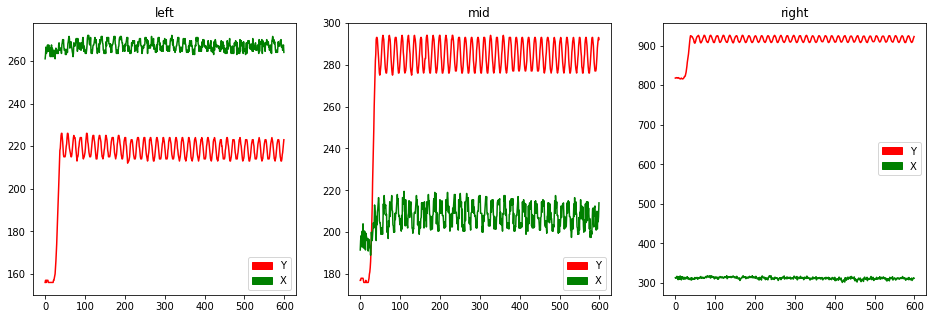

In [21]:
#圖一
plt.figure(figsize=(16,5))
plt.subplot(131)
plot_finction(left_600,title="left")
plt.subplot(132)
plot_finction(mid_600,title="mid")
plt.subplot(133)
plot_finction(right_600,title="right")

In [22]:
M_normalize, D, V = pca(M)
M_pca = V.T @ M_normalize

每個component的解釋量<br>
由此我們可以知道我們大多的varance極中在pc1

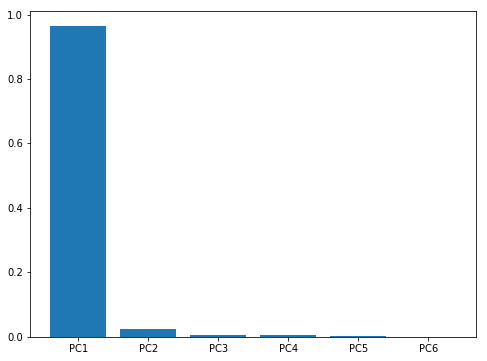

In [23]:
#圖二
tag_tmp=D/sum(D)
x = range(len(tag_tmp))
plt.figure(figsize=(8,6))
plt.bar(x,tag_tmp)
plt.xticks(x,["PC1","PC2","PC3","PC4","PC5","PC6"])
plt.show()

In [24]:
tag_tmp

array([9.63843545e-01, 2.31489672e-02, 5.82107215e-03, 4.09934088e-03,
       2.68889074e-03, 3.98184132e-04])

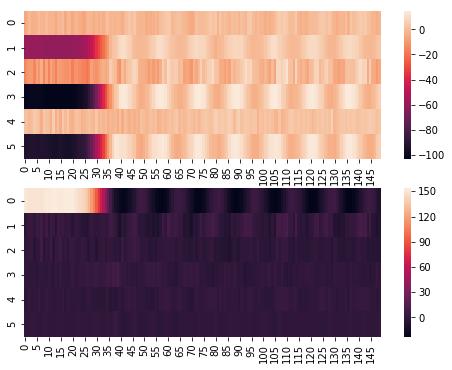

In [25]:
#因太長所以畫前150
#圖三(a)(b)
plt.figure(figsize=(8,6))
plt.subplot(211)
ax = sns.heatmap(M_normalize[:,:150])
plt.subplot(212)
ax = sns.heatmap(M_pca[:,:150])

從pc1~pc5可觀察到pc1的變量最大<br>
且pc1似乎解釋了每個角度y軸的變量

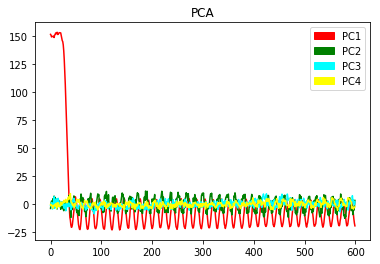

In [26]:
#圖四
plot_pca(M_pca)

In [32]:
M_pca.shape

(6, 600)

pc1 vs left y軸<br>
pc1 vs mid y軸<br>
pc1 vs right y軸<br>

/home/thtang/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


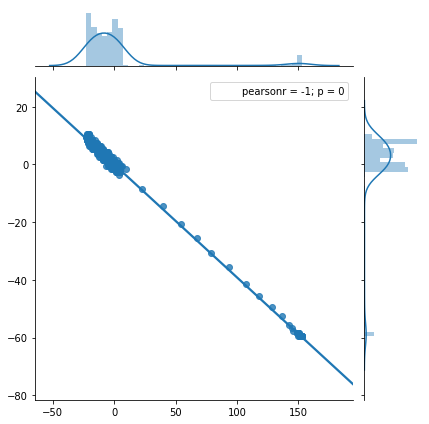

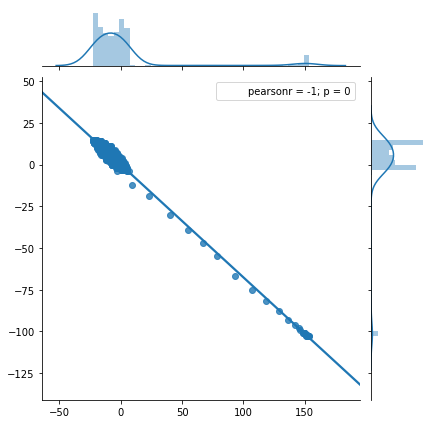

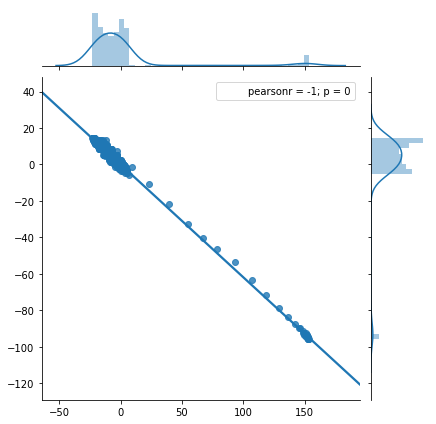

In [27]:
#圖五(a)(b)(c)
a1 = sns.jointplot(x=M_pca[0,:] , y= M_normalize[1,:], kind="reg")
a2 = sns.jointplot(x=M_pca[0,:] , y= M_normalize[3,:], kind="reg")
a3 = sns.jointplot(x=M_pca[0,:] , y= M_normalize[5,:], kind="reg")

pc2 vs left x軸<br>
pc2 vs mid x軸<br>
pc2 vs right x軸<br>

/home/thtang/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


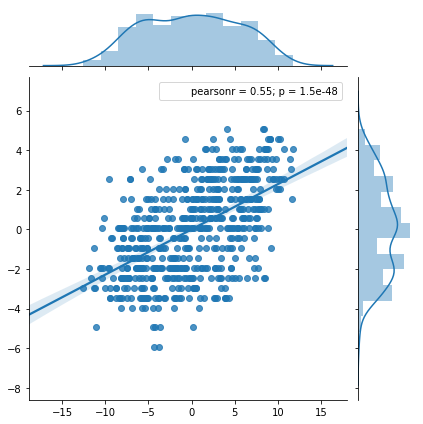

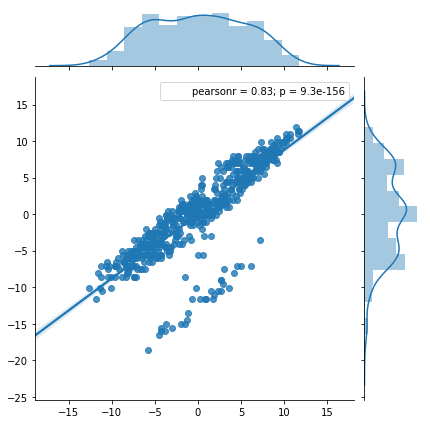

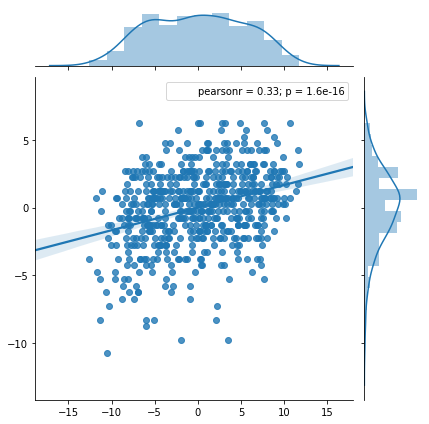

In [28]:
#圖六(a)(b)(c)
a1 = sns.jointplot(x=M_pca[1,:] , y= M_normalize[0,:], kind="reg")
a2 = sns.jointplot(x=M_pca[1,:] , y= M_normalize[2,:], kind="reg")
a3 = sns.jointplot(x=M_pca[1,:] , y= M_normalize[4,:], kind="reg")

pc3 with left x軸<br>
pc3 with left y軸

/home/thtang/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


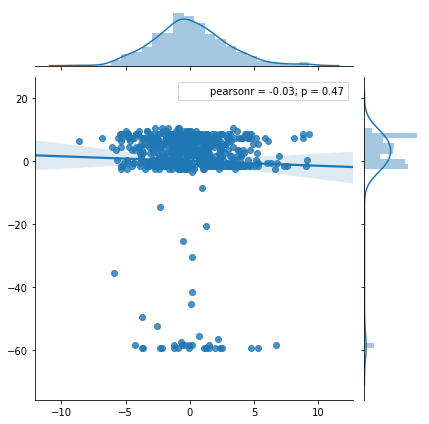

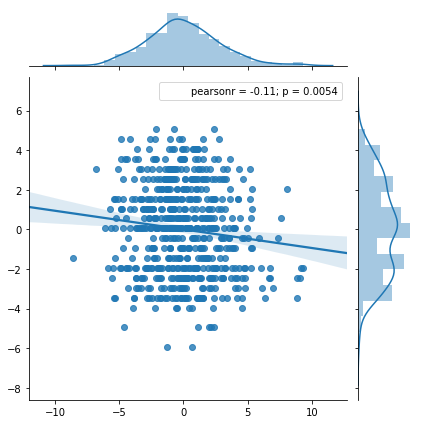

In [29]:
#圖七(a)(b)
sns.jointplot(x=M_pca[2,:] , y= M_normalize[1,:], kind="reg")
sns.jointplot(x=M_pca[2,:] , y= M_normalize[0,:], kind="reg")

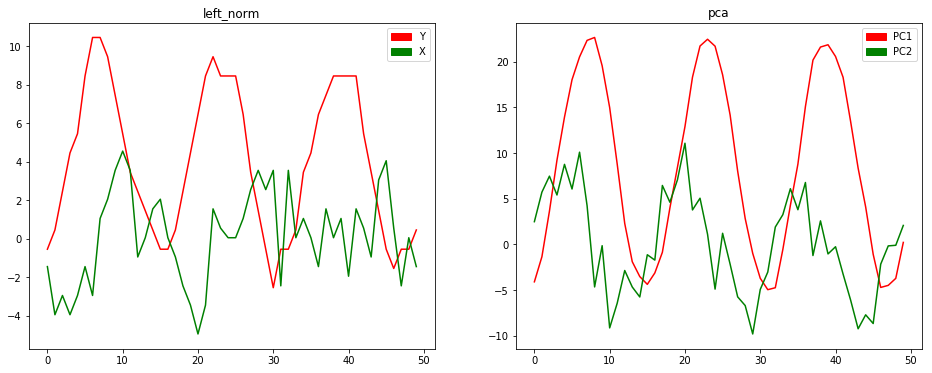

In [33]:
#圖八
plt.figure(figsize=(16,6))
plt.subplot(121)
plot_finction(M_normalize[range(0,2),50:100].T,title="left_norm")
plt.subplot(122)
plot_finction2(-M_pca[range(0,2),50:100].T,title="pca")

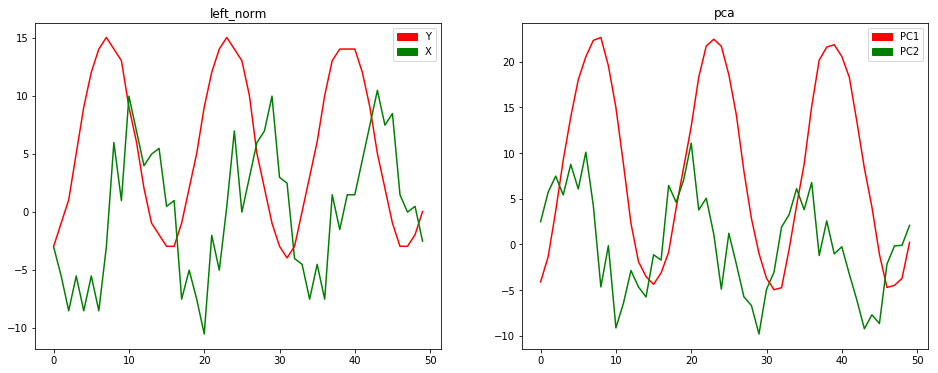

In [35]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plot_finction(M_normalize[range(2,4),50:100].T,title="left_norm")
plt.subplot(122)
plot_finction2(-M_pca[range(0,2),50:100].T,title="pca")

結論:<br>
本次分析的目的是想就藉由pca去分離虎克定律主要變量及其餘的干擾變量，<br>
從圖二中我們就可發現first component佔整體varance的解釋量有96.5%，這現象也可以在圖三級圖四中被再次驗證<br>
另外也可由圖四和圖一間的交互觀察中發現pc1似乎與y軸有某些關係，<br>
而此關係也可從圖五看出並經Pearson correlation的檢定證明之有線性關係，<br>
另一方面也順便觀察了pc2與X軸雖不如前者強但期間依然是有線性關係的，<br>
依以上分析與實驗觀察可知PC1似乎就可當作虎克定律的主效應，PC2可當作在做實驗砝碼所產生的左右晃動，<br>
最後由圖八可觀察到PC1的曲線相對於觀察圖更平滑，我想這就是去除干擾的結果。